<a href="https://colab.research.google.com/github/MartinSantaGitHub/python-ml-course/blob/master/code/T11%20-%201%20-%20TensorFlow101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Tensor Flow

In [ ]:
%tensorflow_version 1.x

In [111]:
import os
import numpy as np
import random
import tensorflow as tf
import skimage.io as imd
import matplotlib.pyplot as plt
from skimage import transform
from skimage.color import rgb2gray
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(tf.__version__)

1.15.2


In [ ]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [ ]:
res = tf.multiply(x1,x2)
res

<tf.Tensor 'Mul_1:0' shape=(5,) dtype=int32>

In [ ]:
print(res)

Tensor("Mul_1:0", shape=(5,), dtype=int32)


In [ ]:
res.dtype

tf.int32

In [ ]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [ ]:
with tf.Session() as sess:
  output = sess.run(res)
  print(output)

[ 6 14 24 36 50]


In [ ]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Aprendizaje neuronal de las señales de tráfico

In [ ]:
def load_ml_data(data_directory):
  dirs = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory,d))]

  labels = []
  images = []

  for d in dirs:
    label_dir = os.path.join(data_directory,d)
    file_names = [os.path.join(label_dir,f) for f in os.listdir(label_dir) if f.endswith(".ppm")]

    for f in file_names:
      images.append(imd.imread(f))
      labels.append(int(d))
  
  return images, labels

In [ ]:
main_dir = "/content/drive/My Drive/datasets/belgian/"
train_data_dir = os.path.join(main_dir,"Training")
test_data_dir = os.path.join(main_dir,"Testing")

In [ ]:
images, labels = load_ml_data(train_data_dir)

In [93]:
len(images)

4575

In [ ]:
images = np.array(images)

In [ ]:
labels = np.array(labels)

In [ ]:
images.size

4575

In [ ]:
images.ndim

1

In [ ]:
images[0]

array([[[ 39,  38,  37],
        [ 37,  36,  36],
        [ 35,  36,  34],
        ...,
        [ 28,  26,  26],
        [ 27,  25,  25],
        [ 27,  25,  25]],

       [[ 37,  36,  35],
        [ 36,  36,  34],
        [ 35,  36,  34],
        ...,
        [ 28,  26,  26],
        [ 28,  26,  26],
        [ 26,  24,  24]],

       [[ 35,  34,  32],
        [ 35,  35,  32],
        [ 36,  37,  33],
        ...,
        [ 27,  25,  26],
        [ 28,  26,  26],
        [ 25,  23,  24]],

       ...,

       [[ 50,  46,  40],
        [ 50,  46,  39],
        [ 50,  46,  39],
        ...,
        [ 84, 100,  57],
        [ 84,  98,  55],
        [ 86,  98,  55]],

       [[ 52,  48,  42],
        [ 51,  48,  41],
        [ 51,  47,  40],
        ...,
        [ 83, 100,  58],
        [ 84,  99,  57],
        [ 87,  99,  57]],

       [[ 53,  48,  43],
        [ 52,  48,  42],
        [ 51,  48,  41],
        ...,
        [ 75,  91,  51],
        [ 77,  90,  51],
        [ 80,  91,  52]]

In [ ]:
len(set(labels))

62

In [ ]:
labels[0]

6

In [ ]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [ ]:
images.itemsize

8

In [ ]:
images.nbytes

36600

In [92]:
images.nbytes / images.itemsize

4575.0

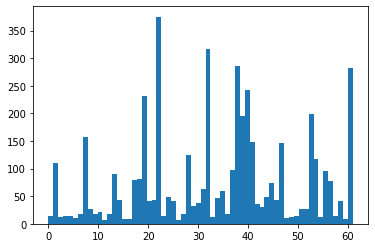

In [91]:
plt.hist(labels,len(set(labels)))
plt.show()

In [95]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[2683, 4171, 4136, 584, 3705, 3178]

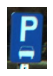

Forma:(108, 69, 3), min:0, max:255


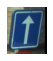

Forma:(192, 160, 3), min:0, max:233


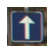

Forma:(73, 74, 3), min:18, max:246


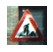

Forma:(92, 94, 3), min:0, max:255


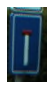

Forma:(93, 49, 3), min:0, max:253


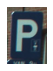

Forma:(121, 84, 3), min:0, max:255


In [98]:
for i in range(len(rand_signs)):
  temp_im = images[rand_signs[i]]

  plt.subplot(1,6,i+1)
  plt.axis("off")
  plt.imshow(temp_im)
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print(f"Forma:{temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")

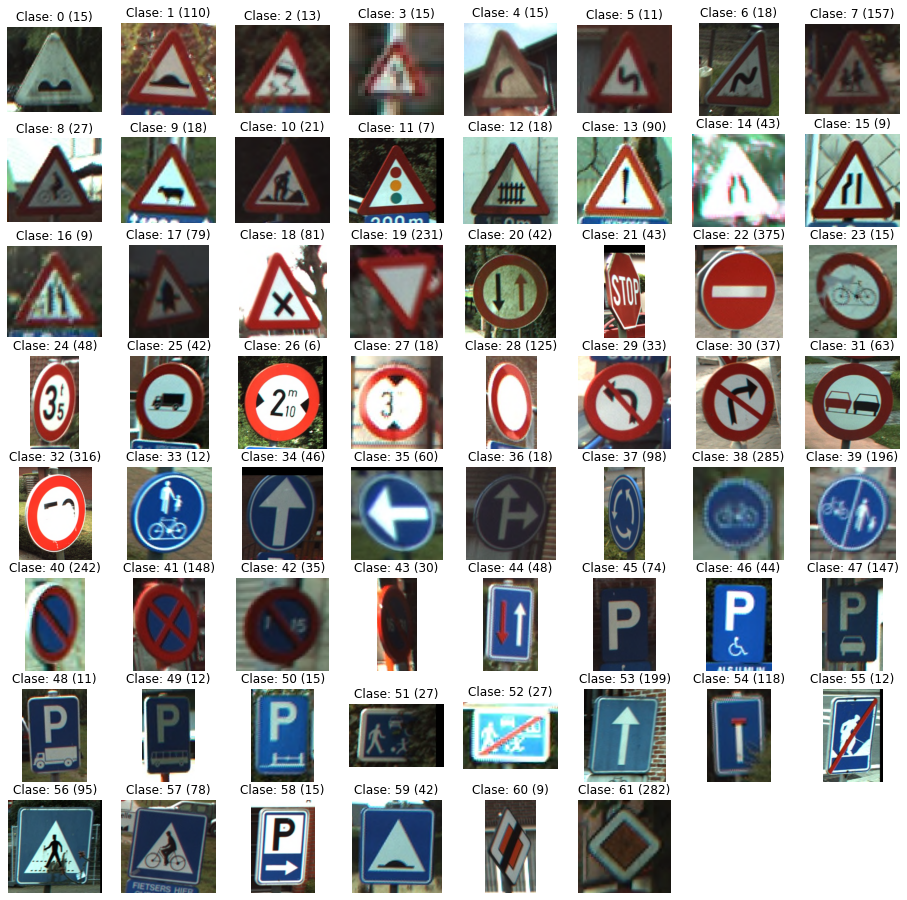

In [101]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
  temp_im = images[list(labels).index(label)]
  plt.subplot(8,8,i)
  plt.axis("off")
  plt.title(f"Clase: {label} ({list(labels).count(label)})")
  i += 1
  plt.imshow(temp_im)
plt.show()

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [106]:
w = 9999 
h = 9999
for image in images:
  if image.shape[0] < h:
    h = image.shape[0]
  if image.shape[1] < w:
    w = image.shape[1]
print(f"Tamaño mínimo: {h}x{w}")

Tamaño mínimo: 22x20


In [107]:
images30 = [transform.resize(image,(30,30)) for image in images]

In [108]:
images30[0]

array([[[0.13333333, 0.13503268, 0.11776035],
        [0.14143791, 0.14928105, 0.14143791],
        [0.13272331, 0.14078431, 0.13686275],
        ...,
        [0.09411765, 0.09411765, 0.09411765],
        [0.09803922, 0.09529412, 0.09411765],
        [0.10169935, 0.09385621, 0.09411765]],

       [[0.1688366 , 0.15921569, 0.12392157],
        [0.15019608, 0.14352941, 0.11372549],
        [0.15058824, 0.15464052, 0.12078431],
        ...,
        [0.11215686, 0.11163399, 0.10117647],
        [0.11215686, 0.11607843, 0.10117647],
        [0.11864052, 0.12614379, 0.10509804]],

       [[0.24331155, 0.22108932, 0.18448802],
        [0.23189542, 0.21908497, 0.17777778],
        [0.23006536, 0.22614379, 0.18583878],
        ...,
        [0.16949891, 0.17102397, 0.14749455],
        [0.16457516, 0.16849673, 0.14104575],
        [0.16618736, 0.17198257, 0.14135076]],

       ...,

       [[0.19215686, 0.16993464, 0.14976035],
        [0.17137255, 0.1530719 , 0.13346405],
        [0.16666667, 0

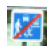

Forma:(30, 30, 3), min:0.10867647058823526, max:0.996078431372549


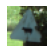

Forma:(30, 30, 3), min:0.040605664488017376, max:0.9516470588235284


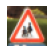

Forma:(30, 30, 3), min:0.09333333333333362, max:0.996078431372549


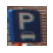

Forma:(30, 30, 3), min:0.0707821350762527, max:0.9903562091503268


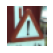

Forma:(30, 30, 3), min:0.0980392156862745, max:0.996078431372549


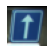

Forma:(30, 30, 3), min:0.006405228758169961, max:0.996078431372549


In [109]:
rand_signs = random.sample(range(0,len(labels)),6)

for i in range(len(rand_signs)):
  temp_im = images30[rand_signs[i]]

  plt.subplot(1,6,i+1)
  plt.axis("off")
  plt.imshow(temp_im)
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print(f"Forma:{temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")

In [112]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

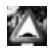

Forma:(30, 30), min:0.06859722875816995, max:0.9702957516339871


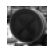

Forma:(30, 30), min:0.14341601851851848, max:0.9852862156862742


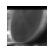

Forma:(30, 30), min:0.0, max:0.816591882352941


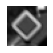

Forma:(30, 30), min:0.06583937254901963, max:0.7636444771241833


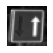

Forma:(30, 30), min:0.042029575163398704, max:0.6500072745098032


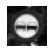

Forma:(30, 30), min:0.03976627450980392, max:0.7163552941176455


In [114]:
rand_signs = random.sample(range(0,len(labels)),6)

for i in range(len(rand_signs)):
  temp_im = images30[rand_signs[i]]

  plt.subplot(1,6,i+1)
  plt.axis("off")
  plt.imshow(temp_im,cmap="gray")
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print(f"Forma:{temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")

In [116]:
x = tf.placeholder(dtype = tf.float32,shape=[None,30,30])
y = tf.placeholder(dtype = tf.int32,shape=[None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred,tf.float32))

In [117]:
images_flat

<tf.Tensor 'Flatten_1/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [118]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [119]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [120]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [124]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(300):  
  _,accuracy_val = sess.run([train_opt,accuracy], feed_dict={x: images30, y: list(labels)})
  _,loss_val = sess.run([train_opt,loss], feed_dict={x: images30, y: list(labels)})
  if i % 10 == 0:
    print(f"EPOCH {i}")
    print(f"Accuracy: {accuracy_val}")
    print(f"Loss: {loss_val}")
  #print(f"Fin del Epoch {i}")

EPOCH 0
Accuracy: 15.354754447937012
Loss: 4.0438432693481445
EPOCH 10
Accuracy: 32.70644760131836
Loss: 3.2375876903533936
EPOCH 20
Accuracy: 35.69355010986328
Loss: 2.8232662677764893
EPOCH 30
Accuracy: 35.24306106567383
Loss: 2.5639548301696777
EPOCH 40
Accuracy: 35.27475357055664
Loss: 2.3950905799865723
EPOCH 50
Accuracy: 35.33573913574219
Loss: 2.2761213779449463
EPOCH 60
Accuracy: 35.2067756652832
Loss: 2.186638832092285
EPOCH 70
Accuracy: 35.08830642700195
Loss: 2.115414619445801
EPOCH 80
Accuracy: 35.14950942993164
Loss: 2.0564651489257812
EPOCH 90
Accuracy: 35.103607177734375
Loss: 2.0064260959625244
EPOCH 100
Accuracy: 35.04721450805664
Loss: 1.9631354808807373
EPOCH 110
Accuracy: 34.97224044799805
Loss: 1.9251127243041992
EPOCH 120
Accuracy: 34.88437271118164
Loss: 1.8913153409957886
EPOCH 130
Accuracy: 34.86601257324219
Loss: 1.860940933227539
EPOCH 140
Accuracy: 34.79278564453125
Loss: 1.833459496498108
EPOCH 150
Accuracy: 34.74054718017578
Loss: 1.8084514141082764
EPOCH 

# Evaluación de la red neuronal

In [137]:
sample_idx = random.sample(range(len(images30)),40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [138]:
sample_labels

[44,
 46,
 39,
 38,
 47,
 21,
 30,
 38,
 31,
 40,
 28,
 20,
 7,
 32,
 38,
 31,
 22,
 7,
 32,
 40,
 17,
 47,
 57,
 39,
 32,
 32,
 25,
 19,
 40,
 47,
 13,
 32,
 40,
 7,
 22,
 25,
 41,
 7,
 41,
 38]

In [141]:
prediction = sess.run([final_pred],feed_dict={x:sample_images})[0]

In [142]:
prediction

array([44, 45, 39, 38, 47, 21, 32, 38, 32, 40, 28, 40,  7, 32, 38, 32, 22,
        7, 32, 40,  7, 47, 57, 39, 32, 32, 32, 19, 40, 47, 13, 32, 40,  7,
       22, 32, 40,  7, 40, 38])

In [143]:
sample_labels

[44,
 46,
 39,
 38,
 47,
 21,
 30,
 38,
 31,
 40,
 28,
 20,
 7,
 32,
 38,
 31,
 22,
 7,
 32,
 40,
 17,
 47,
 57,
 39,
 32,
 32,
 25,
 19,
 40,
 47,
 13,
 32,
 40,
 7,
 22,
 25,
 41,
 7,
 41,
 38]

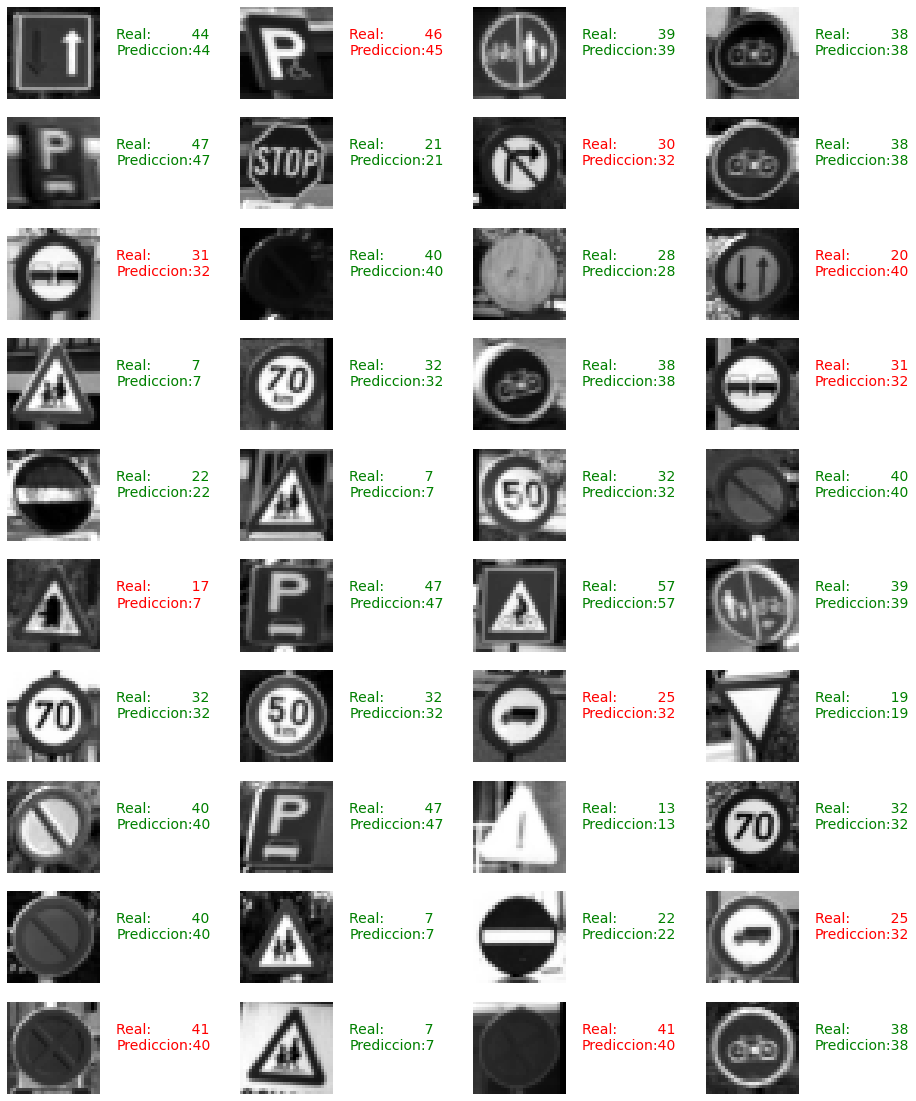

In [144]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
  truth = sample_labels[i]
  pred = prediction[i]
  plt.subplot(10,4,i+1)
  plt.axis("off")
  color = "green" if truth == pred else "red"
  plt.text(35,15, f"Real:         {truth}\nPrediccion:{pred}", fontsize=14,color=color)
  plt.imshow(sample_images[i],cmap="gray")
plt.show()

In [145]:
test_images, test_labels = load_ml_data(test_data_dir)

In [146]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [147]:
len(test_images30)

2520